In [254]:
from plot import *
from gen import *
from load_data import *  
from func_tools import *
from AGM import *
from GM import *
# from BFGS import *
from Newton_CG import *
import warnings
warnings.filterwarnings('ignore')

In [255]:
centroids, points, N = gen_data()

In [256]:
lbd = 0.05
delta = 0.01
cg_max = 10
tol = 0.001
cg_tol_k = 0.001 # 可以使用同样的tol
alpha0 = 1
gamma = 0.01
sigma = 0.5
n = points.shape[0]
d = points.shape[1]
B = gen_B(n,sparse=False)
func = lambda X, B: loss_func(X,points,lbd,delta,B)
h_obj = OBJ(d, n, delta)
grad = lambda X: grad_hub_matrix(X,delta,points,lbd,B,B.T)
HessianP = lambda X: h_obj.hessiant(X.T, h_obj.grad(X.T, points.T, lbd).reshape((d,n)), lbd)
bck = lambda X, gk, dk: backtrack(X, func, gk, dk,B,alpha0,gamma,sigma)

In [257]:
ans3, CG_loss = NewtonCG(grad, HessianP, bck, np.zeros_like(points), cg_max, cg_tol_k, tol)

25.37348552958234 1
9.66822453835963 1
3.434590506847723 0.25
not the first step 10.623097716268093 614.7125373126106 45.884593033848894 3.813938794458891
2.196683691248966 0.125
0.9672625232971412 0.125
not the first step 1.5816227559798355 102.90396079016638 9.95331330047387 0.5721767137399144
1.1681459895462074 0.125
not the first step 3.1248047036709075 719.8130484671193 28.98559504432042 0.5101154616604194
0.44890175441462965 0.03125
not the first step 0.8542881628571749 58.54137744217576 5.116518718734743 0.10588867633755714
not the first step 6.782867456623832e+18 2.1866927360653955e+35 3.1270655135345466e+17 2.2594292197760117e-16
0.748298496153328 1.3552527156068805e-20
0.29282964773598685 0.0625
not the first step 0.16801598352240282 9.25036968971158 1.6328647171922372 0.14944952416182
0.4730905313543592 0.25
not the first step 1.554365592036354 2924.6470176576036 37.19557646828017 0.06812077714624487
not the first step 7.067704995327058e+19 1.5824710927915954e+35 2.736040097

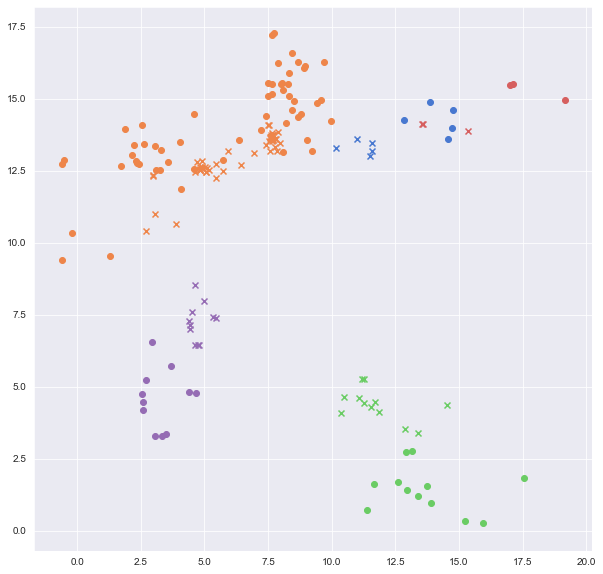

In [258]:
groups = get_group(ans3, tol=2)
plt.figure(figsize=(10,10))
plot_res_data(points,ans3,groups)

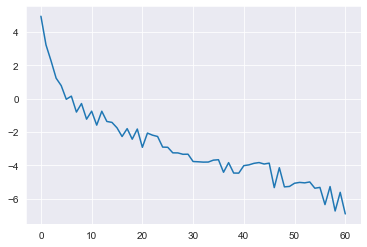

In [156]:
plt.plot(np.log(CG_loss))

## 大数据集上运行CG

In [157]:
big_data, big_label = load_wine()

In [185]:
lbd = 0.02
delta = 0.01
cg_max = 10
tol = 0.001
cg_tol_k = 0.001 # 可以使用同样的tol
alpha0 = 1
gamma = 0.01
sigma = 0.5

points = big_data.toarray().T
n = points.shape[0]
d = points.shape[1]
B = gen_B(n,sparse=False)
func = lambda X, B: loss_func(X,points,lbd,delta,B)
h_obj = OBJ(d, n, delta)
grad = lambda X: grad_hub_matrix(X,delta,points,lbd,B,B.T)
HessianP = lambda X: h_obj.hessiant(X.T, h_obj.grad(X.T, points.T, lbd).reshape((d,n)), lbd)
bck = lambda X, gk, dk: backtrack(X, func, gk, dk,B,alpha0,gamma,sigma)

In [186]:
ans3, CG_loss = NewtonCG(grad, HessianP, bck, np.zeros_like(points), cg_max, cg_tol_k, tol)

17.13659485661258 0.0078125
41.046624895896024 0.015625
20.77320142093269 0.0078125
31.789274089018697 0.015625
24.274693287015847 0.0078125
not the first step 40.51786516293439 615164.9248110213 3864.278101179724 353.03250876492103
not the first step 1.4435381126977073e+21 1.2158961257932167e+36 5.432763862020558e+18 6.363558750195336e-09
not the first step 6.225942760331957e+50 1.8044291375570118e+36 6.618239921457242e+18 5.764119930057366e+22
22.222985684145698 3.3409558876152446e-52
not the first step 71.47926689432272 10700851.324799802 15420.914981569002 153.54197755901563
21.865992164391887 0.001953125
12.475407135404417 0.00390625
27.24185357292999 0.015625
31.26508462143714 0.0078125
25.882781332614186 0.0078125
22.786292462010586 0.0078125
not the first step 27.75948915254699 1376557.2780026156 5600.569356841235 426.19615962280454
14.82963700154609 0.00390625
21.558965849692527 0.0078125
12.519868486723858 0.00390625
16.66422501626263 0.0078125
22.329811922621452 0.0078125
31

In [234]:
groups = get_group(ans3, tol=0.00282)
groups

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  3,  3,  0,  0,  0,  0,  0,  0,
        3,  4,  5,  6,  0,  7,  8,  0,  0,  0,  9, 10,  0,  0,  0,  3,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11, 12,  0,  0, 13,  0,  0,
        0,  0,  0, 14,  0,  0,  0,  0, 15,  0,  0,  0,  0, 16,  0,  0,  3,
        0,  0, 17, 10, 18, 19,  0,  0, 20,  0,  0,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3, 21, 21,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3])

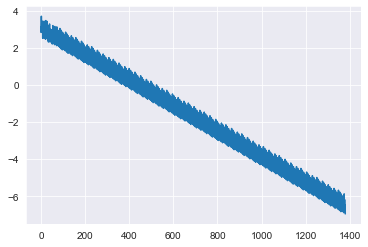

In [188]:
plt.plot(np.log(CG_loss))

In [231]:
kk = big_label.flatten()
norm(groups - kk + 1)

31.480152477394387

In [236]:
kk

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=uint8)

In [235]:
groups

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  3,  3,  0,  0,  0,  0,  0,  0,
        3,  4,  5,  6,  0,  7,  8,  0,  0,  0,  9, 10,  0,  0,  0,  3,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11, 12,  0,  0, 13,  0,  0,
        0,  0,  0, 14,  0,  0,  0,  0, 15,  0,  0,  0,  0, 16,  0,  0,  3,
        0,  0, 17, 10, 18, 19,  0,  0, 20,  0,  0,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3, 21, 21,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3])

In [251]:
big_data, big_label = load_mnist()